### E-Commerece Customer Segmentation Using RFM Approach

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('E-com_Data.csv')

In [3]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [5]:
%timeit

In [6]:
df.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [7]:
df.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [8]:
#These are the insignificant columns as Price is multiplication of price per unit and Quantity
# Itemcode is irrelevant as we are only interested in customer behaviour
# Time is not required here like in Stock Market Predictions as Recency can be seen by date and Invoice No.
df.drop(['Sold as set','Cancelled_status',
         'Shipping Location','price per Unit','Time',
         'Quantity','Item Code','Reason of return'],inplace =True,axis = 1)
df.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [9]:
df.duplicated().sum()

6008

In [10]:
df = df.drop_duplicates(ignore_index = True)
print(f'Number of duplicates after preprocessing is {df.duplicated().sum()}')

Number of duplicates after preprocessing is 0


In [11]:
df = df.rename(columns = {'InvoieNo': 'InvoiceNo','Date of purchase':'Date'})
df.head()

,CustomerID,InvoiceNo,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [12]:
df.isnull().sum()

CustomerID    132249
InvoiceNo          1
Date               1
Price              1
dtype: int64

In [13]:
# As in the RFM Approach We are focusing on Recency,Frequency,And Monetary Value for Customers
# As the data with absence of CustomerID in Data doesnot serve the purpose of Segmentation 
print(f"As {round(((df['CustomerID'].isnull().sum() / len(df)) * 100),2)} percent of CustomerID data is missing, we will drop the rows.")
df = df.dropna(subset= ['CustomerID'])
print('After dropping the na values:')
print(df.isnull().sum())

As 24.71 percent of CustomerID data is missing, we will drop the rows.
After dropping the na values:
CustomerID    0
InvoiceNo     0
Date          0
Price         0
dtype: int64


In [14]:
#DateTime Analysis
# As the Date is Given in a Object Datatype we have to convert to DateTime
df.info()
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402859 entries, 0 to 535079
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  402859 non-null  float64
 1   InvoiceNo   402859 non-null  float64
 2   Date        402859 non-null  object 
 3   Price       402859 non-null  float64
dtypes: float64(3), object(1)
memory usage: 15.4+ MB


count                  402859
unique                    381
top       2017-11-24 00:00:00
freq                     2507
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [15]:
#As for the Recency or to know how much old customer is we can take date a day after the last date in data as reference.

# How recently the customer has bought can be calculated w.r.t to the lastest date

# And Many Invoice Generate for a single Customer ID will give us the Frequency

# Sum of the Price for the total Amount a customer has spent.
latest_data = pd.datetime(2017,12,20)
RFMScore = df.groupby('CustomerID').agg({'Date' :lambda x :(latest_data - x.max()).days,
                                       'InvoiceNo': lambda x : x.count(),
                                       'Price': lambda x : x.sum()})
RFMScore.rename(columns = {'Date':'Recency','InvoiceNo':'Frequency','Price':'Monetary'},inplace = True)

In [16]:
RFMScore.reset_index(inplace = True)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,181,550416.0
1,3.0,77,27,257404.0
2,4.0,20,72,176613.0
3,5.0,18,16,41976.0
4,6.0,9,84,151822.0


In [18]:
RFMScore.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4349.0,2187.093355,1261.544319,2.0,1095.0,2186.0,3279.0,4372.0
Recency,4349.0,61.445160,89.656941,1.0,10.0,19.0,73.0,617.0
Frequency,4349.0,92.632559,230.742279,1.0,17.0,42.0,101.0,7919.0
Monetary,4349.0,229493.932881,855668.518674,-50372.0,38140.0,83635.0,205444.0,35472089.0


# Segmentation Concept

In [19]:
RFMScore['Recency'].describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

In [20]:
RFMScore['Frequency'].describe()

count    4349.000000
mean       92.632559
std       230.742279
min         1.000000
25%        17.000000
50%        42.000000
75%       101.000000
max      7919.000000
Name: Frequency, dtype: float64

In [21]:
RFMScore['Monetary'].describe()

count    4.349000e+03
mean     2.294939e+05
std      8.556685e+05
min     -5.037200e+04
25%      3.814000e+04
50%      8.363500e+04
75%      2.054440e+05
max      3.547209e+07
Name: Monetary, dtype: float64

In [22]:
quantile = RFMScore.quantile(q = [0.25,0.5,0.75])
quantile = pd.DataFrame(quantile.to_dict())
quantile

,CustomerID,Recency,Frequency,Monetary
0.25,1095.0,10.0,17.0,38140.0
0.50,2186.0,19.0,42.0,83635.0
0.75,3279.0,73.0,101.0,205444.0


In [23]:
#As More Recent Customer is more Valuable Customer in Recency 

# x = Condition,d = RFMScore['Recency'],p = quantile
def recency_score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x<= d[p][0.50]:
        return 2
    elif x<= d[p][0.75]:
        return 3
    else:
        return 4

In [24]:
RFMScore['Recency_Score'] = RFMScore['Recency'].apply(recency_score, args =('Recency',quantile))

In [25]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score
0,2.0,4,181,550416.0,1
1,3.0,77,27,257404.0,4
2,4.0,20,72,176613.0,3
3,5.0,18,16,41976.0,2
4,6.0,9,84,151822.0,1


In [26]:
def FreqNMon_score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<= d[p][0.75]:
        return 2
    else:
        return 1

In [27]:
RFMScore['Frequency_Score'] = RFMScore['Frequency'].apply(FreqNMon_score, args =('Frequency',quantile))
RFMScore['Monetary_Score'] = RFMScore['Monetary'].apply(FreqNMon_score, args =('Monetary',quantile))

In [28]:
RFMScore

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,2.0,4,181,550416.0,1,1,1
1,3.0,77,27,257404.0,4,3,1
2,4.0,20,72,176613.0,3,2,2
3,5.0,18,16,41976.0,2,4,3
4,6.0,9,84,151822.0,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,10,20480.0,2,4,4
4345,4369.0,181,7,10774.0,4,4,4
4346,4370.0,12,13,24962.0,2,4,4
4347,4371.0,4,751,279720.0,1,1,1


In [29]:
#RFM Columns will be all the Scores combined not added
RFMScore['RFM'] = RFMScore.Recency_Score.map(str)+RFMScore.Frequency_Score.map(str)+RFMScore.Monetary_Score.map(str)

In [30]:
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM
0,2.0,4,181,550416.0,1,1,1,111
1,3.0,77,27,257404.0,4,3,1,431
2,4.0,20,72,176613.0,3,2,2,322
3,5.0,18,16,41976.0,2,4,3,243
4,6.0,9,84,151822.0,1,2,2,122


In [31]:
RFMScore['RFMScore'] = RFMScore[['Recency_Score','Frequency_Score','Monetary_Score']].sum(axis = 1)
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM,RFMScore
0,2.0,4,181,550416.0,1,1,1,111,3
1,3.0,77,27,257404.0,4,3,1,431,8
2,4.0,20,72,176613.0,3,2,2,322,7
3,5.0,18,16,41976.0,2,4,3,243,9
4,6.0,9,84,151822.0,1,2,2,122,5


In [32]:
RFMScore['RFMScore'].value_counts()

3     509
10    480
9     460
8     451
7     439
12    408
11    404
5     402
6     399
4     397
Name: RFMScore, dtype: int64

In [33]:
# We are going to Label Customer as per the Quantile Cutoff
Customer_Seg = ['Platinum','Gold','Silver','Bronze']
score_cut = pd.qcut(RFMScore['RFMScore'],q = 4,labels = Customer_Seg)
RFMScore['Customer_Seg'] = score_cut.values
RFMScore.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM,RFMScore,Customer_Seg
0,2.0,4,181,550416.0,1,1,1,111,3,Platinum
1,3.0,77,27,257404.0,4,3,1,431,8,Gold
2,4.0,20,72,176613.0,3,2,2,322,7,Gold
3,5.0,18,16,41976.0,2,4,3,243,9,Silver
4,6.0,9,84,151822.0,1,2,2,122,5,Platinum


In [34]:
seg_map={
    r'[1][1-2][2-3]':"Inactive or Passerby customers ",
    r'[1-2][1-3][3]':"at-Risk",
    r'[1-2][1-4][3-4]':"cant_lose",
    r'[1][1-4][2-4]':"about_to_sleep",
    r'[3][3][3]':"need_attention",
    r'[3-4][3-4][2-4]':"promising",
    r'[1-2][1-4][1-2]':"new customer",
    r'[3-4][[1-2][1-2]':'Nurture',
    r'[3-4][[1-2][3-4]': 'Drive_Loyality',
    }

RFMScore["Segment"]=RFMScore["RFM"].replace(seg_map,regex=True)
RFMScore['Segment'].value_counts()


promising                          1324
new customer                       1179
Nurture                             430
Inactive or Passerby customers      351
cant_lose                           306
at-Risk                             301
Drive_Loyality                      193
need_attention                      163
about_to_sleep                       57
331                                  18
431                                  10
441                                  10
341                                   7
Name: Segment, dtype: int64

In [35]:
RFMScore.to_csv('Segmentation_analysis.csv')

# Visualization

In [36]:
new_datapoint = RFMScore.groupby('Customer_Seg')[['Recency','Frequency','Monetary','CustomerID']].agg({
    'Recency':'sum','Frequency':'sum','Monetary':'sum','CustomerID':'nunique'
    }).reset_index()

In [37]:
new_datapoint = new_datapoint.rename(columns = {'CustomerID':'No of Customers'} )

In [38]:
new_datapoint['Customer Percent'] =round(new_datapoint['No of Customers']/new_datapoint['No of Customers'].sum()*100,2)
new_datapoint

,Customer_Seg,Recency,Frequency,Monetary,No of Customers,Customer Percent
0,Platinum,13340,297150,765731356.0,1308,30.08
1,Gold,42079,73994,160271639.0,1289,29.64
2,Silver,78927,23588,52766014.1,940,21.61
3,Bronze,132879,8127,19300105.0,812,18.67


In [39]:
new_datapoint.drop(['Recency','Frequency','Monetary'],axis = 1,inplace = True)

In [40]:
new_datapoint

,Customer_Seg,No of Customers,Customer Percent
0,Platinum,1308,30.08
1,Gold,1289,29.64
2,Silver,940,21.61
3,Bronze,812,18.67


In [41]:
import squarify

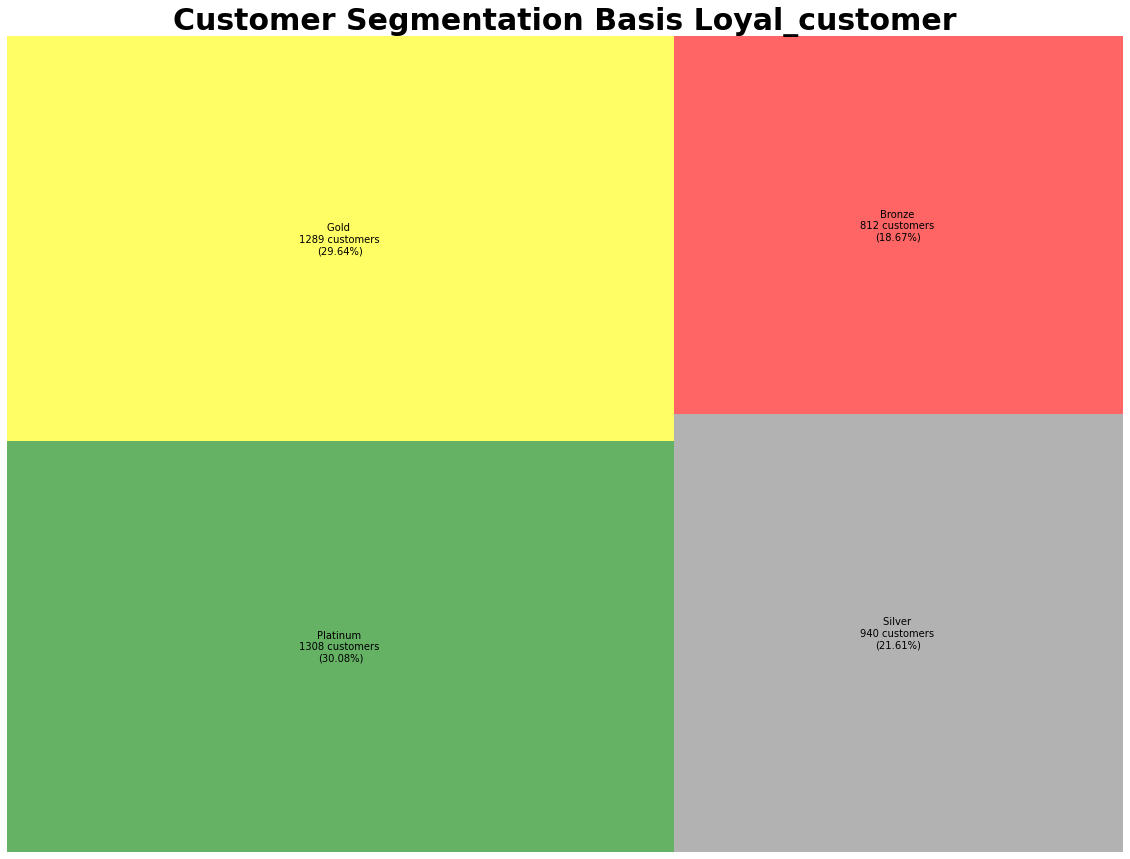

In [42]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)
colors_dics = {'Platinum':'green', 'Gold':"yellow",'Silver':'gray','Bronze':'red'}

squarify.plot(sizes=new_datapoint['No of Customers'],color=colors_dics.values(),
             label = ['{} \n{:.0f} customers \n({}%)'.format(*new_datapoint.iloc[i]) 
                      for i in range(0, len(new_datapoint))], alpha=0.6)
plt.title("Customer Segmentation Basis Loyal_customer", fontsize=30, fontweight='bold')
plt.axis("off")
plt.show()

In [43]:
RFM = RFMScore[['Recency','Frequency','Monetary']]

In [44]:
RFM

,Recency,Frequency,Monetary
0,4,181,550416.0
1,77,27,257404.0
2,20,72,176613.0
3,18,16,41976.0
4,9,84,151822.0
...,...,...,...
4344,17,10,20480.0
4345,181,7,10774.0
4346,12,13,24962.0
4347,4,751,279720.0


In [45]:
#Preprocessing Scaling
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()
RFM_sc = sc.fit_transform(RFM)
scaled_data = pd.DataFrame(RFM_sc,index = RFM.index,columns = RFM.columns)

In [47]:
scaled_data

,Recency,Frequency,Monetary
0,-0.640796,0.383014,0.375097
1,0.173513,-0.284474,0.032622
2,-0.462317,-0.089428,-0.061808
3,-0.484627,-0.332151,-0.219173
4,-0.585021,-0.037416,-0.090784
...,...,...,...
4344,-0.495782,-0.358157,-0.244298
4345,1.333623,-0.371160,-0.255642
4346,-0.551556,-0.345154,-0.239059
4347,-0.640796,2.853587,0.058705


# Model Building

### K-Means

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [49]:
wcss = []

for i in range(2,30):
    KM = KMeans(n_clusters = i,init = 'k-means++',max_iter = 1000,random_state = 101)
    KM.fit(scaled_data)
    wcss.append(KM.inertia_)

In [50]:
wcss[:10]

[9014.850261247644,
 5556.252595830578,
 4360.01764079818,
 3395.5113997655812,
 2484.308783838068,
 1977.385006518356,
 1707.295146849586,
 1549.3674511554395,
 1295.7580014294865,
 1130.8929188869624]

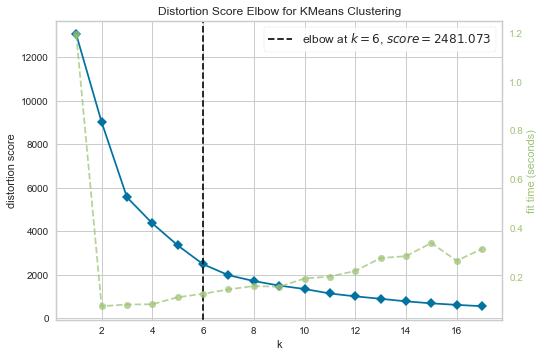

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
#Visualizing the K Vs Distortion Score for K-Elbow Method
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,18)).fit(pd.DataFrame(scaled_data))
visualizer.show()

In [156]:
KM = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=101)
cluster_labels = KM.fit_predict(scaled_data)

silhouette_avg = round(silhouette_score(scaled_data, cluster_labels),3)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.703


In [157]:
davies_bouldin_idx = round(davies_bouldin_score(scaled_data, KM.labels_),3)
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")

Davies-Bouldin Index: 0.507


In [ ]:
#### Silhouette Score 

In [148]:
RFM['Cluster'] = KM.labels_

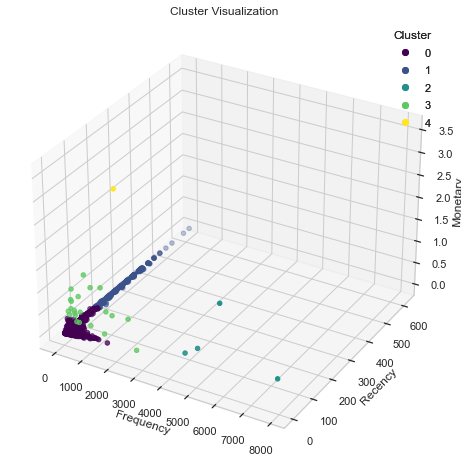

In [149]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(RFM['Frequency'], RFM['Recency'], RFM['Monetary'], c=RFM['Cluster'],cmap = 'viridis')
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary')
ax.set_title('Cluster Visualization')
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)
plt.show()

#### KMeans has form 5 Clusters for Customer Segmentation with Silhouette Score = 0.6724495026139948.As the Number of clusters increases the Silhouette Score is decreasing but the Optimal Score is taken from the Analysis

### DBSCAN Clustering

In [55]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [81]:
#DBSCAN Clustering
epsilons = [0.1,0.2,0.3,0.5,0.6,0.7]
min_samples = [3,5,7,9]

best_silhouette_score = -1
best_eps_min_samples = None

for epsilon in epsilons:
    for min_sample in min_samples:
        dbscan = DBSCAN(eps=epsilon, min_samples=min_sample)
        DBSCAN_labels = dbscan.fit_predict(scaled_data)
        
        #Ignoring Clusters with only Noise or Outliers
        if len(set(DBSCAN_labels)) ==1:
            continue
         
        #For Each Iteration the Silhouette Score
        silhouette_avg = silhouette_score(scaled_data, DBSCAN_labels)
        unique_labels = np.unique(DBSCAN_labels)
        print(f'Epsilon = {epsilon},Min Sample = {min_sample}, Silhouette Score = {silhouette_avg},Clusters:{len(unique_labels)-1}')
         
        #We need more than two clusters to have Distinguished Customer Segmentation
        if silhouette_avg>best_silhouette_score and (len(unique_labels)-1) > 2 :
              best_silhouette_score = silhouette_avg
              best_eps_min_samples = (epsilon,min_sample)
print(f'Best Silhouette Score :{best_silhouette_score},Best min samples:{best_eps_min_samples}')

Epsilon = 0.1,Min Sample = 3, Silhouette Score = -0.364920467757743,Clusters:30
Epsilon = 0.1,Min Sample = 5, Silhouette Score = -0.2708182041489418,Clusters:14
Epsilon = 0.1,Min Sample = 7, Silhouette Score = 0.26797420056290033,Clusters:5
Epsilon = 0.1,Min Sample = 9, Silhouette Score = 0.32444292300390926,Clusters:6
Epsilon = 0.2,Min Sample = 3, Silhouette Score = -0.030424741645788737,Clusters:11
Epsilon = 0.2,Min Sample = 5, Silhouette Score = 0.257779239093786,Clusters:6
Epsilon = 0.2,Min Sample = 7, Silhouette Score = 0.2682548967217356,Clusters:4
Epsilon = 0.2,Min Sample = 9, Silhouette Score = 0.24665526644960017,Clusters:4
Epsilon = 0.3,Min Sample = 3, Silhouette Score = 0.47794446989166667,Clusters:8
Epsilon = 0.3,Min Sample = 5, Silhouette Score = 0.5779989404630234,Clusters:4
Epsilon = 0.3,Min Sample = 7, Silhouette Score = 0.39713822674369575,Clusters:3
Epsilon = 0.3,Min Sample = 9, Silhouette Score = 0.6193337846712293,Clusters:2
Epsilon = 0.5,Min Sample = 3, Silhouette 

In [68]:
from sklearn.neighbors import NearestNeighbors

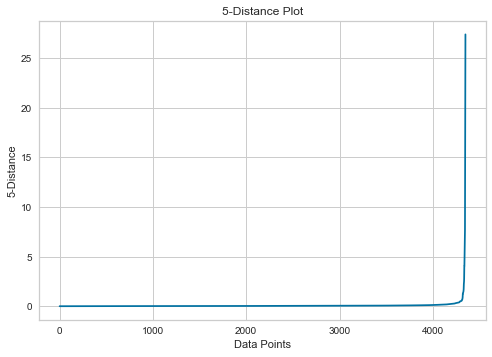

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(scaled_data)

# Calculate the distances to the k-th nearest neighbor
distances, _ = neighbors.kneighbors(scaled_data)
sorted_distances = np.sort(distances[:, -1])

# Plot the k-distance plot
plt.plot(np.arange(1, len(sorted_distances) + 1), sorted_distances)
plt.ylabel(f"{k}-Distance")
plt.xlabel("Data Points")
plt.title(f"{k}-Distance Plot")
plt.grid(True)
plt.show()

##### In Nearest Neighbor graph also the optimal epsilon value which is the radius within which the algorithm looks for neighboring point is near 0.5.

In [82]:
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(scaled_data)
DBSCAN_labels = dbscan.labels_    

In [83]:
RFM['Cluster'] = dbscan.labels_

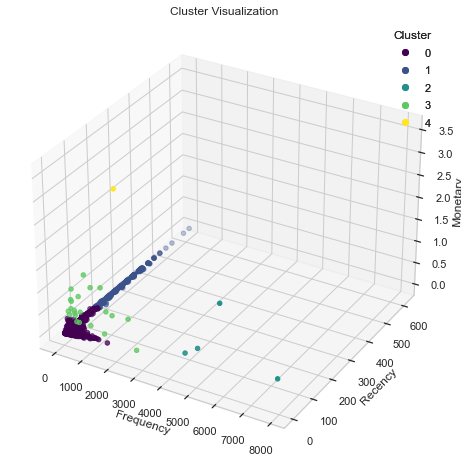

In [151]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(RFM['Frequency'], RFM['Recency'], RFM['Monetary'], c=RFM['Cluster'], cmap='viridis')
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary')
ax.set_title('Cluster Visualization')
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)
plt.show()

#### One Cluster formed to be in Outlier or Noise thats is -1.So Only Three Clusters can be defined from DBSCAN

In [85]:
unique_labels = np.unique(DBSCAN_labels)
print(unique_labels)

[-1  0  1  2]


In [158]:
silhouette_avg = round(silhouette_score(scaled_data, DBSCAN_labels),3)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.656


In [159]:
davies_bouldin_idx = round(davies_bouldin_score(scaled_data, DBSCAN_labels),3)
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")

Davies-Bouldin Index: 1.1


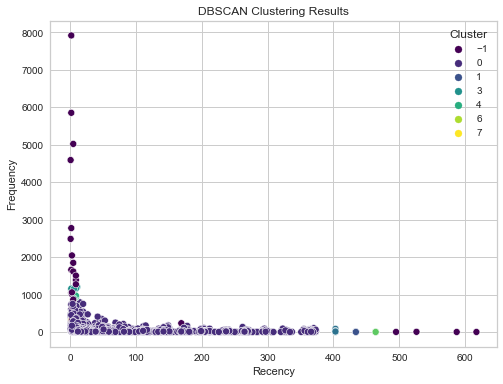

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recency', y='Frequency', hue=DBSCAN_labels, palette='viridis', data=RFM)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.legend(title='Cluster')
plt.show()

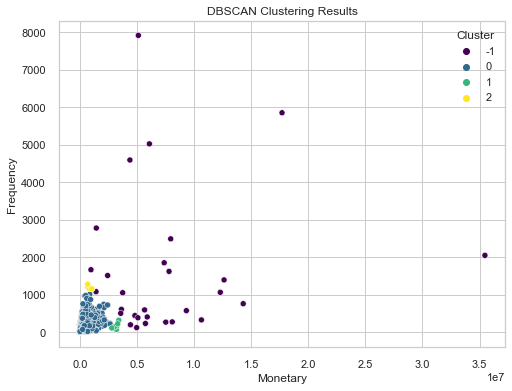

In [106]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Monetary', y='Frequency', hue=DBSCAN_labels, palette='viridis', data=RFM)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Monetary")
plt.ylabel("Frequency")
plt.legend(title='Cluster')
plt.show()

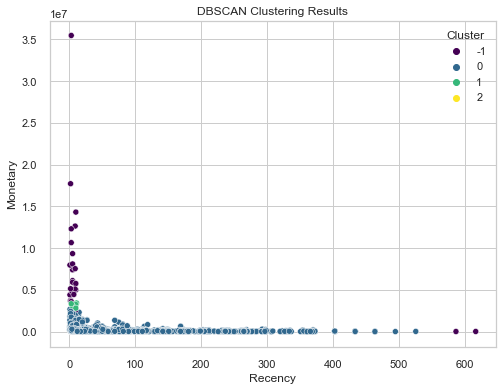

In [107]:
plt.figure(figsize=(8, 6))
sns.scatterplot(y='Monetary', x='Recency', hue=DBSCAN_labels, palette='viridis', data=RFM)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend(title='Cluster')
plt.show()

In [108]:
from sklearn.cluster import AgglomerativeClustering

In [131]:
num_clusters= [2,3,4,5,6,7]
linkages = ['ward', 'complete', 'average', 'single']
best_silhouette = 0

for num_cluster in num_clusters:
    for linkage in linkages:
        agg_cluster = AgglomerativeClustering(n_clusters =num_cluster, linkage=linkage)
        agg_label = agg_cluster.fit_predict(scaled_data)
        silhouette_avg = round(silhouette_score(scaled_data, agg_label),2)
        print(f"Silhouette_Score: {best_silhouette},Cluster:{num_cluster},Linkage:{linkage}")
        
        if silhouette_avg>best_silhouette:
            best_silhouette = silhouette_avg
            best_params = (num_cluster,linkage)
print(f"best_silhouette: {best_silhouette},Best_Param:{best_params}")
        

Silhouette_Score: 0,Cluster:2,Linkage:ward
Silhouette_Score: 0.91,Cluster:2,Linkage:complete
Silhouette_Score: 0.97,Cluster:2,Linkage:average
Silhouette_Score: 0.97,Cluster:2,Linkage:single
Silhouette_Score: 0.97,Cluster:3,Linkage:ward
Silhouette_Score: 0.97,Cluster:3,Linkage:complete
Silhouette_Score: 0.97,Cluster:3,Linkage:average
Silhouette_Score: 0.97,Cluster:3,Linkage:single
Silhouette_Score: 0.97,Cluster:4,Linkage:ward
Silhouette_Score: 0.97,Cluster:4,Linkage:complete
Silhouette_Score: 0.97,Cluster:4,Linkage:average
Silhouette_Score: 0.97,Cluster:4,Linkage:single
Silhouette_Score: 0.97,Cluster:5,Linkage:ward
Silhouette_Score: 0.97,Cluster:5,Linkage:complete
Silhouette_Score: 0.97,Cluster:5,Linkage:average
Silhouette_Score: 0.97,Cluster:5,Linkage:single
Silhouette_Score: 0.97,Cluster:6,Linkage:ward
Silhouette_Score: 0.97,Cluster:6,Linkage:complete
Silhouette_Score: 0.97,Cluster:6,Linkage:average
Silhouette_Score: 0.97,Cluster:6,Linkage:single
Silhouette_Score: 0.97,Cluster:7,Linka

In [132]:
agg_cluster = AgglomerativeClustering(n_clusters =2, linkage='complete')
agg_label = agg_cluster.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, agg_label)
print(f"Silhouette_Score: {best_silhouette}")

Silhouette_Score: 0.97


In [133]:
#As Davies-Bouldin Index Near Zero meaning the Cluster are less similar to each other
davies_bouldin_idx = round(davies_bouldin_score(scaled_data, agg_label),2)
print(f"Davies-Bouldin Index: {davies_bouldin_idx}")

Davies-Bouldin Index: 0.02


In [134]:
RFM['Cluster'] = agg_label

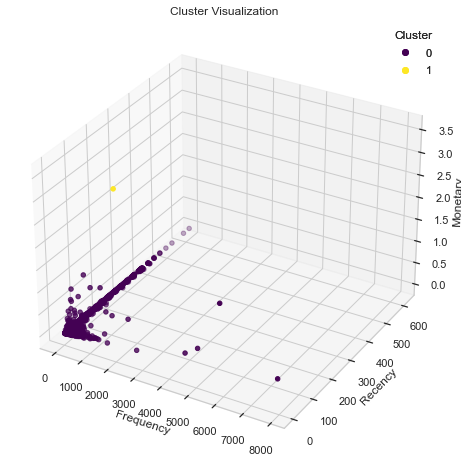

In [135]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(RFM['Frequency'], RFM['Recency'], RFM['Monetary'], c=RFM['Cluster'], cmap='viridis')
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary')
ax.set_title('Cluster Visualization')
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)

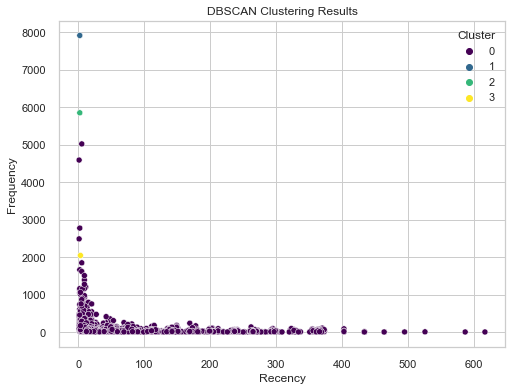

In [114]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Recency', y='Frequency', hue=agg_label, palette='viridis', data=RFM)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.legend(title='Cluster')
plt.show()

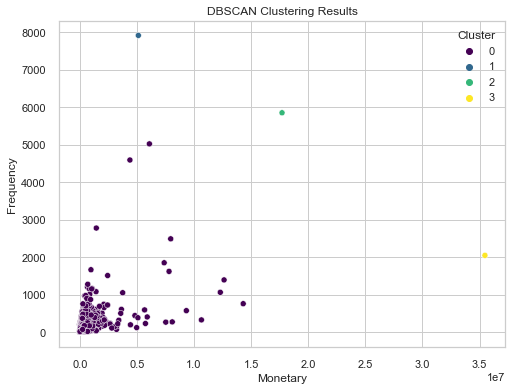

In [115]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Monetary', y='Frequency', hue=agg_label, palette='viridis', data=RFM)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Monetary")
plt.ylabel("Frequency")
plt.legend(title='Cluster')
plt.show()

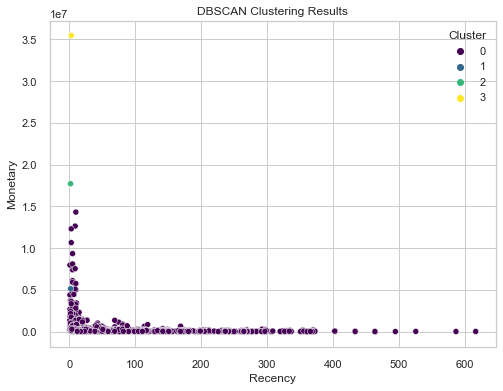

In [116]:
plt.figure(figsize=(8, 6))
sns.scatterplot(y='Monetary', x='Recency', hue=agg_label, palette='viridis', data=RFM)
plt.title("DBSCAN Clustering Results")
plt.xlabel("Recency")
plt.ylabel("Monetary")
plt.legend(title='Cluster')
plt.show()

In [122]:
scaled_data.head()

,Recency,Frequency,Monetary,Clusters
0,-0.640796,0.383014,0.375097,0
1,0.173513,-0.284474,0.032622,0
2,-0.462317,-0.089428,-0.061808,0
3,-0.484627,-0.332151,-0.219173,0
4,-0.585021,-0.037416,-0.090784,0


In [125]:
cluster_0_df = RFM[RFM['Clusters'] == 0].head(1)
cluster_1_df = RFM[RFM['Clusters'] == 1].head(1)
cluster_2_df = RFM[RFM['Clusters'] == 2].head(1)
cluster_3_df = RFM[RFM['Clusters'] == 3].head(1)
cluster_4_df = RFM[RFM['Clusters'] == 4].head(1)
result_df = pd.concat([cluster_0_df, cluster_1_df, cluster_2_df, cluster_3_df, cluster_4_df], axis=0)
result_df

,Recency,Frequency,Monetary,Cluster,Clusters
0,4,181,550416.0,0,0
4021,2,7919,5134340.0,1,1
1886,2,5854,17710859.0,2,2
1694,3,2045,35472089.0,3,3


In [208]:
scaled_data['Clusters'] =KM.labels_

In [209]:
RFM['Clusters'] = scaled_data['Clusters']

In [210]:
kmeans_model = KMeans(n_clusters=5, random_state=42)
cluster_assignments = kmeans_model.fit_predict(scaled_data)

# Analyze the clusters
for cluster_num in range(5):
    cluster_data_points = scaled_data[cluster_assignments == cluster_num]
    print(f"Cluster {cluster_num} has {len(cluster_data_points)} data points.")

Cluster 0 has 3687 data points.
Cluster 1 has 635 data points.
Cluster 2 has 4 data points.
Cluster 3 has 22 data points.
Cluster 4 has 1 data points.


In [231]:
def Clusters(num):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))


    sns.histplot(data=RFM[RFM['Cluster'] == num], hue='Cluster', x='Recency', palette="viridis", ax=axes[0])
    axes[0].set_title("Recency")

    sns.histplot(data=RFM[RFM['Cluster'] == num], hue='Cluster', x='Frequency', palette="tab10", ax=axes[1])
    axes[1].set_title("Frequency")


    sns.histplot(data=RFM[RFM['Cluster'] == num], hue='Cluster', x='Monetary', palette="tab10", ax=axes[2])
    axes[2].set_title("Monetary")

    plt.subplots_adjust(wspace=0.3)

    plt.show()

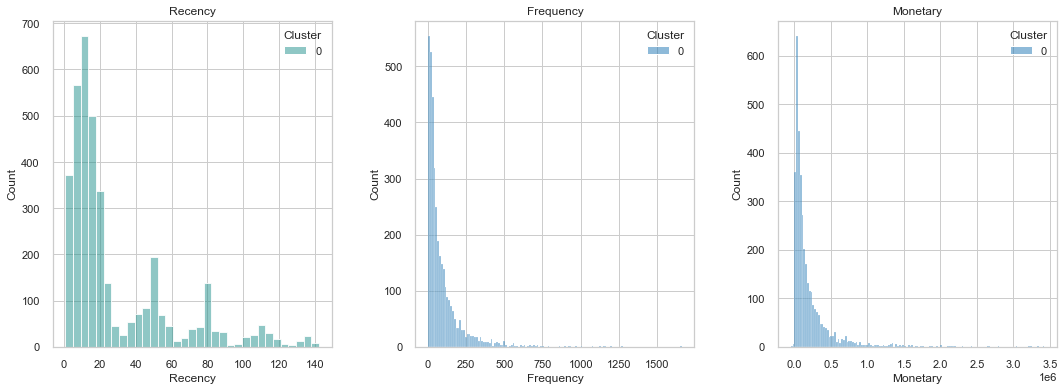

In [232]:
Clusters(0)

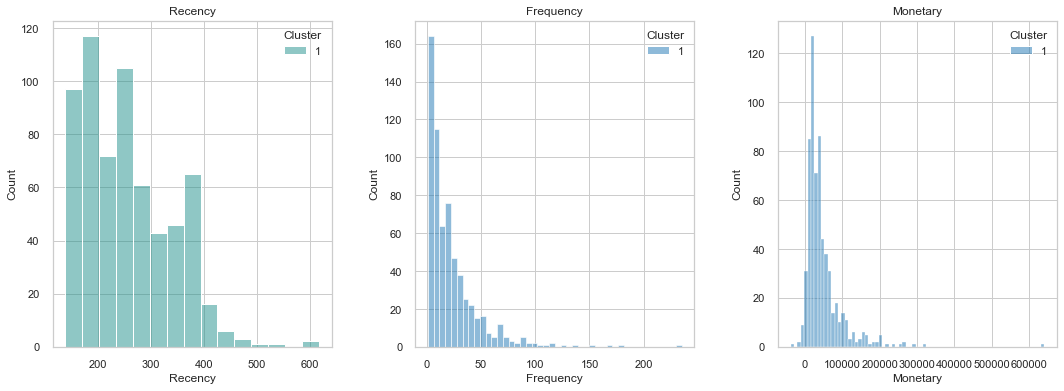

In [213]:
Clusters(1)

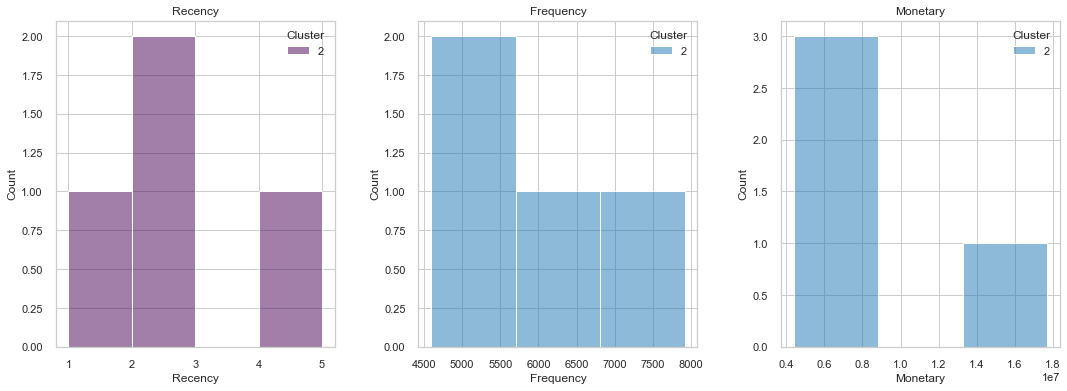

In [205]:
Clusters(2)

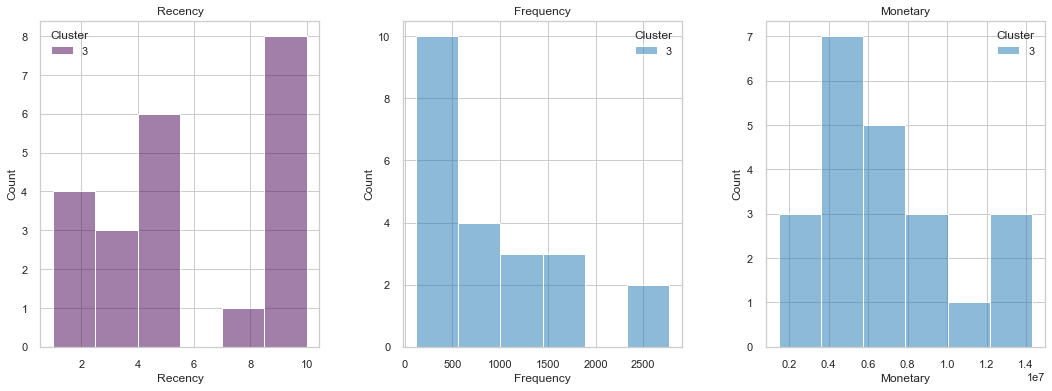

In [206]:
Clusters(3)

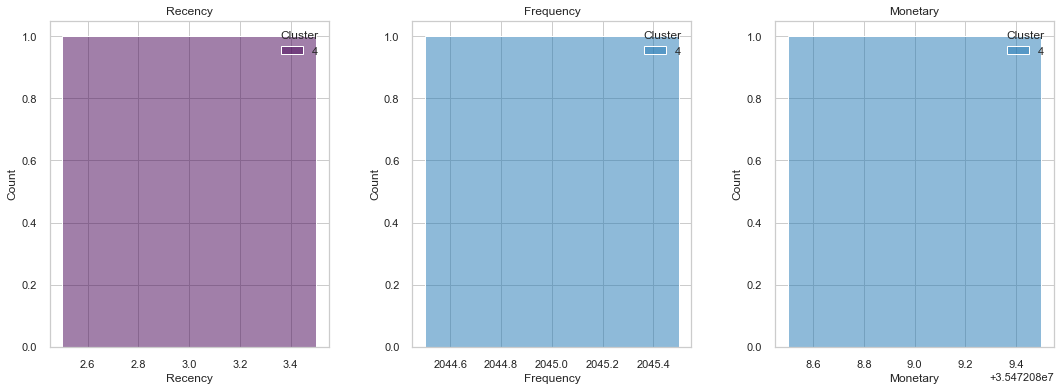

In [207]:
Clusters(4)

In [235]:
def assign_cluster_labels(cluster):
    if cluster == 0:
        return 'Inactive and Recent Customers'
    elif cluster == 1:
        return 'Inactive and Low-Value Customers'
    elif cluster == 2:
        return 'High-Value and Highly Active Customers'
    elif cluster == 3:
        return  "Valuable and Moderately Active Customers"
    elif cluster == 4:
        return "VIP Customers"

#Assigning Customer Labels as per the part of Customer Segmentation by Clustering    
RFM['Cluster_Labels'] = RFM['Clusters'].apply(assign_cluster_labels)

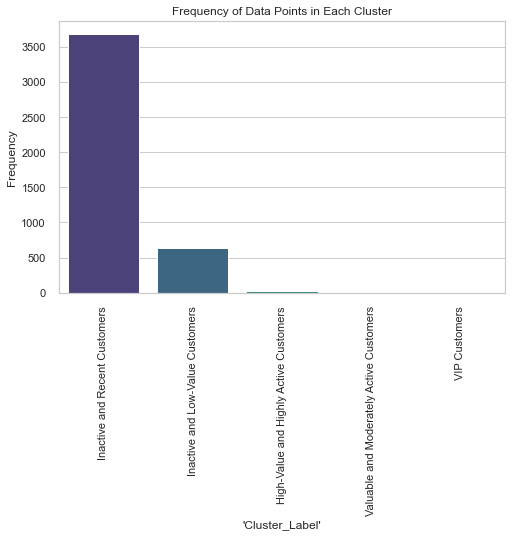

In [236]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster_Labels', data=RFM, palette='viridis')
plt.xlabel("'Cluster_Label'")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.title("Frequency of Data Points in Each Cluster")
plt.show()

## Final Results

In [2]:
from prettytable import PrettyTable    
y = PrettyTable()
y.field_names = ["Clusters",'Customers']
y.add_row([0,'Inactive and Recent Customers'])
y.add_row([1,'Inactive and Low-Value Customers'])
y.add_row([2,'High-Value and Highly Active Customers'])
y.add_row([3,"Valuable and Moderately Active Customers"])
y.add_row([4,"VIP Customers"])


In [165]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Clustering Algorithm", "Silhouette Score", "Davies-Bouldin Index"]
x.add_row(["KMeans  Clustering",0.703,0.507])
x.add_row(["DSCAN  Clustering",0.656,1.1])
x.add_row(["Agglomerative Clustering",0.97,0.02])
print(x)

+--------------------------+------------------+----------------------+
|   Clustering Algorithm   | Silhouette Score | Davies-Bouldin Index |
+--------------------------+------------------+----------------------+
|    KMeans  Clustering    |      0.703       |        0.507         |
|    DSCAN  Clustering     |      0.656       |         1.1          |
| Agglomerative Clustering |       0.97       |         0.02         |
+--------------------------+------------------+----------------------+


- KMeans Clusters were chosen Silhouette Score and Davies-Bouldin Index at optimal values :
- In DBSCAN even though Silhouette Score = 0.656 but the Davies-Bouldin Index = 1.1 which means the cluster similarity 
is high comparatively 
- In Agglomerative Clustering Silhouette Score and Davies-Bouldin Index were better than KMeans but Clusters were less 
and highly overlapping.


In [3]:
print(y)

+----------+------------------------------------------+
| Clusters |                Customers                 |
+----------+------------------------------------------+
|    0     |      Inactive and Recent Customers       |
|    1     |     Inactive and Low-Value Customers     |
|    2     |  High-Value and Highly Active Customers  |
|    3     | Valuable and Moderately Active Customers |
|    4     |              VIP Customers               |
+----------+------------------------------------------+
